In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning libraries
import sklearn as sk
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
from google.colab import drive

In [ ]:
# Mounts the Google Drive to the specified directory '/content/drive'
# This allows access to files and data stored in your Google Drive within the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


***DATA COLLECTION***

In [ ]:
# Reasa CSV file into a Pandas DataFrame
# The file 'player_21.csv' is located in the specified Google Drive directory and is loaded into the variabe 'first_dataset' for further data analysis
first_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_21 (1).csv')

In [ ]:
# Create a new Pandas DataFrame 'df1' basedon an existing DataFrame 'first_dataset'
df1 = pd.DataFrame(first_dataset)

***DATA PREPROCESSING***

In [ ]:
# Access and display the column labels (column names) of Pandas DataFrame
df1.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
# Seelct columns with numeric data typesin the Pandas Dataframe
# This filters and returns ONLY the columns that contain numerical data
df1.select_dtypes(include='number')

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,96,32,35,24,6,11,15,14,8,NaN
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,95,28,32,24,7,11,15,14,11,NaN
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,93,35,30,29,9,9,15,15,11,NaN
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,91,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,47,52,70000.0,1000.0,21,177,70,112165.0,1.0,...,40,45,56,47,12,13,8,14,6,NaN
18940,257933,47,53,70000.0,1000.0,21,174,68,112540.0,1.0,...,35,43,42,53,8,8,13,14,10,NaN
18941,257936,47,47,45000.0,2000.0,28,185,79,111774.0,1.0,...,35,38,43,45,8,5,11,5,7,NaN
18942,258736,47,67,130000.0,500.0,17,171,58,1920.0,4.0,...,45,18,11,13,11,13,9,9,6,NaN


In [ ]:
# The 'verbose = True' option provides detailed information, including the datatypes,non-null counts, and memory usage
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 110 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    sofifa_id                    int64  
 1    player_url                   object 
 2    short_name                   object 
 3    long_name                    object 
 4    player_positions             object 
 5    overall                      int64  
 6    potential                    int64  
 7    value_eur                    float64
 8    wage_eur                     float64
 9    age                          int64  
 10   dob                          object 
 11   height_cm                    int64  
 12   weight_kg                    int64  
 13   club_team_id                 float64
 14   club_name                    object 
 15   league_name                  object 
 16   league_level                 float64
 17   club_position                object 
 18   club_jersey_number      

In [ ]:
# This provides a previewof the top 20 rows of the DataFrame for us to examine
df1.head(20)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,GK,91,93,120000000.0,125000.0,27,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/21_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1361/60.png,https://cdn.sofifa.net/flags/si.png
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,93,110000000.0,260000.0,28,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,CB,90,91,113000000.0,210000.0,28,...,89+2,89+2,89+2,82+3,20+3,https://cdn.sofifa.net/players/203/376/21_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
8,208722,https://sofifa.com/player/208722/sadio-mane/21...,S. Mané,Sadio Mané,LW,90,90,120500000.0,250000.0,28,...,59+3,59+3,59+3,66+3,20+3,https://cdn.sofifa.net/players/208/722/21_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/sn.png
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,RW,90,90,120500000.0,250000.0,28,...,58+3,58+3,58+3,67+3,22+3,https://cdn.sofifa.net/players/209/331/21_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/111130/60.png,https://cdn.sofifa.net/flags/eg.png


*Removing columns with **30%** or more null values*

In [ ]:
# Defines a threshold for missing data
threshold = 0.3

# Calculates the proportion of missing data for each column
nullpercent = df1.isnull().mean()

# Filter the DataFame to retain columns wit missing data proportions less than the specified threshold
df1 = df1.loc[:,nullpercent<threshold]

In [ ]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 102 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    sofifa_id                    int64  
 1    player_url                   object 
 2    short_name                   object 
 3    long_name                    object 
 4    player_positions             object 
 5    overall                      int64  
 6    potential                    int64  
 7    value_eur                    float64
 8    wage_eur                     float64
 9    age                          int64  
 10   dob                          object 
 11   height_cm                    int64  
 12   weight_kg                    int64  
 13   club_team_id                 float64
 14   club_name                    object 
 15   league_name                  object 
 16   league_level                 float64
 17   club_position                object 
 18   club_jersey_number      

In [ ]:
# This filters and returns ONLY the columns that DO NOT contain numeric data, excluding integers, floats, etc.
df1.select_dtypes(exclude=['number'])

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_joined,nationality_name,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,FC Barcelona,Spain Primera Division,CAM,2004-07-01,Argentina,...,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,Juventus,Italian Serie A,LS,2018-07-10,Portugal,...,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png
2,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,2014-07-01,Poland,...,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,Paris Saint-Germain,French Ligue 1,LW,2017-08-03,Brazil,...,62+3,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",1991-06-28,Manchester City,English Premier League,RCM,2015-08-30,Belgium,...,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,1999-04-26,Chongqing Liangjiang Athletic,Chinese Super League,SUB,2020-08-01,China PR,...,45+2,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/cn.png
18940,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,1999-01-07,Shanghai Port FC,Chinese Super League,RES,2020-08-01,China PR,...,47+2,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/cn.png
18941,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,1991-11-20,Tianjin Jinmen Tiger FC,Chinese Super League,RES,2020-08-01,China PR,...,47,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,https://cdn.sofifa.net/flags/cn.png
18942,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,2003-03-30,Oldham Athletic,English League Two,SUB,2020-08-01,England,...,33+2,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/gb-eng.png


In [ ]:
# Select columns with numeric data types
num1=df1.select_dtypes(include=['number'])

# Select columns with non-numeric
obj1=df1.select_dtypes(exclude=['number'])

In [ ]:
# This includes statistics like count, mean, standard deviation, minimum, and quartiles for each numeric columns
num1.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,47908.905551,1.355468,...,48.050412,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,53906.733776,0.739015,...,15.671721,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,6.000000,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,461.000000,1.000000,...,38.750000,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1913.000000,1.000000,...,49.000000,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,110986.000000,1.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,114899.000000,4.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [ ]:
# Import the SimpleImputer classfrom scikit-learn to handle missing values
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the strategyof imputing missing values using the mean
imp=SimpleImputer(strategy="mean")

# Calculate the mean values of the numeric columns in the DataFrame and store them as an array
num1.mean().values

# Fit imputer to the data in 'num1' to replace missing valued with the calculated means
imp.fit(num1)

SimpleImputer()

In [ ]:
# Use the imputer to fill missing values in the DataFrame 'num1' and store the result in 'X'
X=imp.transform(num1)

# Create a new DataFrame'num1_imputed' with values, preserving column names
num1_imputed=pd.DataFrame(X,columns=num1.columns)

In [ ]:
num1 = num1_imputed

In [ ]:
num1.isnull().any()

sofifa_id                      False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
club_team_id                   False
league_level                   False
club_jersey_number             False
club_contract_valid_until      False
nationality_id                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
release_clause_eur             False
pace                           False
shooting                       False
passing                        False
dribbling                      False
defending                      False
physic                         False
attacking_crossing             False
attacking_finishing            False
attacking_heading_accuracy     False
attacking_short_passing        False
a

In [ ]:
# Count the number of null values
num1.isnull().sum()

sofifa_id                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
club_team_id                   0
league_level                   0
club_jersey_number             0
club_contract_valid_until      0
nationality_id                 0
weak_foot                      0
skill_moves                    0
international_reputation       0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_a

In [ ]:
# Forward-fill (ffill) propagates the last observed non-null value forward in each column
new_obj1= obj1.ffill()

In [ ]:
new_obj1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18944 non-null  object
 1   short_name        18944 non-null  object
 2   long_name         18944 non-null  object
 3   player_positions  18944 non-null  object
 4   dob               18944 non-null  object
 5   club_name         18944 non-null  object
 6   league_name       18944 non-null  object
 7   club_position     18944 non-null  object
 8   club_joined       18944 non-null  object
 9   nationality_name  18944 non-null  object
 10  preferred_foot    18944 non-null  object
 11  work_rate         18944 non-null  object
 12  body_type         18944 non-null  object
 13  real_face         18944 non-null  object
 14  ls                18944 non-null  object
 15  st                18944 non-null  object
 16  rs                18944 non-null  object
 17  lw          

In [ ]:
new_obj1.isnull().sum()

player_url          0
short_name          0
long_name           0
player_positions    0
dob                 0
club_name           0
league_name         0
club_position       0
club_joined         0
nationality_name    0
preferred_foot      0
work_rate           0
body_type           0
real_face           0
ls                  0
st                  0
rs                  0
lw                  0
lf                  0
cf                  0
rf                  0
rw                  0
lam                 0
cam                 0
ram                 0
lm                  0
lcm                 0
cm                  0
rcm                 0
rm                  0
lwb                 0
ldm                 0
cdm                 0
rdm                 0
rwb                 0
lb                  0
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
club_logo_url       0
club_flag_url       0
nation_flag_url     0
dtype: int

In [ ]:
new_obj1.isnull().sum()

player_url          0
short_name          0
long_name           0
player_positions    0
dob                 0
club_name           0
league_name         0
club_position       0
club_joined         0
nationality_name    0
preferred_foot      0
work_rate           0
body_type           0
real_face           0
ls                  0
st                  0
rs                  0
lw                  0
lf                  0
cf                  0
rf                  0
rw                  0
lam                 0
cam                 0
ram                 0
lm                  0
lcm                 0
cm                  0
rcm                 0
rm                  0
lwb                 0
ldm                 0
cdm                 0
rdm                 0
rwb                 0
lb                  0
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
club_logo_url       0
club_flag_url       0
nation_flag_url     0
dtype: int

In [ ]:
obj1 = new_obj1


In [ ]:
obj1.isnull().any()

player_url          False
short_name          False
long_name           False
player_positions    False
dob                 False
club_name           False
league_name         False
club_position       False
club_joined         False
nationality_name    False
preferred_foot      False
work_rate           False
body_type           False
real_face           False
ls                  False
st                  False
rs                  False
lw                  False
lf                  False
cf                  False
rf                  False
rw                  False
lam                 False
cam                 False
ram                 False
lm                  False
lcm                 False
cm                  False
rcm                 False
rm                  False
lwb                 False
ldm                 False
cdm                 False
rdm                 False
rwb                 False
lb                  False
lcb                 False
cb                  False
rcb         

In [ ]:
print(obj1.columns)

Index(['player_url', 'short_name', 'long_name', 'player_positions', 'dob',
       'club_name', 'league_name', 'club_position', 'club_joined',
       'nationality_name', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url',
       'club_logo_url', 'club_flag_url', 'nation_flag_url'],
      dtype='object')


In [ ]:
# Import necessary preprocessing tools from scikit-learn
from sklearn.preprocessing import LabelEncoder,StandardScaler

#List of column names to be encoded
columns=['player_url', 'short_name', 'long_name', 'player_positions', 'dob',
       'club_name', 'league_name', 'club_position', 'club_joined',
       'nationality_name', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url',
       'club_logo_url', 'club_flag_url', 'nation_flag_url']

# Create a dictonary to store LabelEncoder instances for each colmun
dict_obj = {}

# Iterate through the list of columns and apply LabelEncoder to each
for col in columns:
  obj=LabelEncoder()
  obj1[col]=obj.fit_transform(obj1[col])
dict_obj[col]=obj


In [ ]:
obj1

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_joined,nationality_name,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,270,10059,10302,539,942,238,41,0,8,6,...,110,59,59,59,110,18,313,494,15,7
1,4338,3261,3332,587,391,361,24,13,1135,123,...,104,66,66,66,104,20,14,557,23,127
2,1631,14329,14687,560,1271,240,19,27,289,122,...,104,96,96,96,104,18,1672,476,12,124
3,1978,13007,12964,331,2438,461,17,14,888,20,...,110,52,52,52,110,20,2019,639,17,21
4,2209,8987,9626,10,2229,407,15,19,487,14,...,185,158,158,158,185,22,2250,1,18,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,18180,17684,18137,55,4982,138,6,28,1769,30,...,44,46,46,46,44,9,18214,222,9,32
18940,18308,6680,18648,149,4875,560,6,21,1769,30,...,49,44,44,44,49,9,18342,247,9,32
18941,18311,15978,18041,149,2366,608,6,21,1769,30,...,48,43,43,43,48,1,18345,201,9,32
18942,18770,16799,7152,560,6175,444,14,28,1769,48,...,26,10,10,10,26,7,18803,440,18,54


In [ ]:
# The resulting DataFrame contains both encoded categorical and numeric data
cleaned_df1= pd.concat([obj1,num1],axis=1)

In [ ]:
cleaned_df1.isnull().sum().sum()

0

In [ ]:
print(cleaned_df1.columns)

Index(['player_url', 'short_name', 'long_name', 'player_positions', 'dob',
       'club_name', 'league_name', 'club_position', 'club_joined',
       'nationality_name',
       ...
       'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object', length=102)


***Feature Selection and Engineering***

In [ ]:
# Calculate the correlation matrix for the Dataframe
correlation_matrix = cleaned_df1.corr()

# Extract the 'overall' column as the target variable
target= cleaned_df1['overall']

# Sort and store the features by their correlation with the 'overall' tagreget variable in descending order
top_features = correlation_matrix['overall'].sort_values(ascending = False)

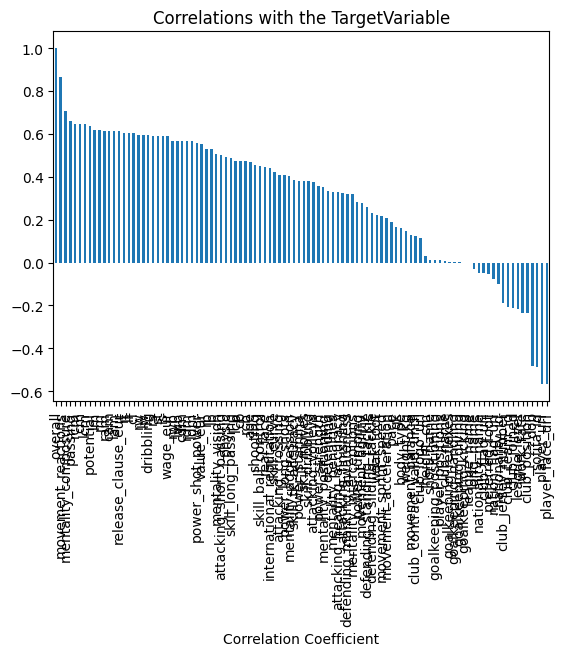

In [ ]:
# Create a bar plot to visualize the correlation of the featues with the target variable
top_features.plot(kind='bar')

# Set the title for the plot
plt.title("Correlations with the TargetVariable")

# Label the x-axis with "Correlation Coefficient"
plt.xlabel("Correlation Coefficient")

# Display the plot
plt.show()

In [ ]:
# Set a correlation threshold limit of 0.55
limits = 0.55

# Extract the column names with the correlation greater than 0.55 with the 'overall' target variable
corrs = correlation_matrix[correlation_matrix['overall']>limits].index

# Create a newDataFrame containing the columns that meet the correlation threshold
chosen_correlations = cleaned_df1[corrs]

#Get the column names
chosen_correlations.columns

# Assigns
features = chosen_correlations

In [ ]:
features.columns

Index(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
       'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
       'passing', 'dribbling', 'movement_reactions', 'power_shot_power',
       'mentality_composure'],
      dtype='object')

*Data Scaling and Splitting*


In [ ]:
# Remove the 'overall' column from the DataFrame 'features'to create the feature matrix 'X'
X = features.drop("overall",axis=1)

# Extract the 'overall'colum as the target variable 'y'
y = features["overall"]

# Create a StandardScaler instance to standardize the feature matrx 'X'
scaler = StandardScaler()

# Standardize the feature matrix 'X'
X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,rwb,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
18775,1,1,1,3,2,2,2,3,3,3,...,2,64.0,100000.0,500.0,119000.0,57.139434,62.45543,32.0,35.0,21.0
17559,49,49,49,40,38,38,38,40,71,71,...,45,74.0,325000.0,750.0,361000.0,52.000000,58.00000,51.0,41.0,52.0
7667,87,87,87,63,60,60,60,63,128,128,...,125,67.0,1000000.0,7000.0,1200000.0,66.000000,68.00000,64.0,71.0,74.0
2638,72,72,72,54,46,46,46,54,96,96,...,162,73.0,2600000.0,5000.0,7000000.0,62.000000,67.00000,73.0,65.0,66.0
18148,35,35,35,31,27,27,27,31,37,37,...,54,70.0,230000.0,1000.0,225000.0,35.000000,50.00000,50.0,26.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,94,94,94,57,56,56,56,57,120,120,...,89,64.0,575000.0,1000.0,744000.0,66.000000,63.00000,64.0,63.0,64.0
11964,34,34,34,26,25,25,25,26,43,43,...,73,64.0,450000.0,2000.0,639000.0,49.000000,44.00000,54.0,40.0,60.0
5390,140,140,140,79,79,79,79,79,149,149,...,58,81.0,3500000.0,7000.0,5000000.0,60.000000,67.00000,69.0,70.0,64.0
860,145,145,145,118,104,104,104,118,211,211,...,113,78.0,16000000.0,33000.0,24200000.0,77.000000,80.00000,78.0,60.0,69.0


In [ ]:
X_test

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,rwb,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
15024,58,58,58,48,44,44,44,48,96,96,...,58,70.0,550000.0,2000.0,618000.0,63.000000,64.00000,55.0,53.0,66.0
11771,105,105,105,48,49,49,49,48,80,80,...,39,75.0,1300000.0,2000.0,1400000.0,46.000000,59.00000,54.0,71.0,60.0
16615,58,58,58,46,43,43,43,46,83,83,...,52,58.0,210000.0,3000.0,215000.0,55.000000,62.00000,54.0,60.0,53.0
4201,77,77,77,51,46,46,46,51,90,90,...,150,71.0,1600000.0,15000.0,4200000.0,60.000000,64.00000,71.0,67.0,73.0
13480,43,43,43,39,35,35,35,39,61,61,...,95,76.0,950000.0,1000.0,1300000.0,51.000000,60.00000,60.0,30.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,67,67,67,57,49,49,49,57,103,103,...,125,78.0,2200000.0,500.0,2900000.0,63.000000,67.00000,64.0,58.0,64.0
5412,16,16,16,16,15,15,15,16,18,18,...,14,69.0,150000.0,3000.0,187000.0,57.139434,62.45543,63.0,53.0,65.0
3755,38,38,38,26,26,26,26,26,43,43,...,101,74.0,2400000.0,750.0,7100000.0,48.000000,37.00000,74.0,34.0,65.0
11886,50,50,50,39,36,36,36,39,61,61,...,101,63.0,325000.0,2000.0,481000.0,52.000000,55.00000,61.0,43.0,52.0


***Building and Training Models***

In [ ]:
# Random Forest Regressor
np.random.seed(42)
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)
forest_model.score(X_test,y_test)

0.9817529402385372

In [ ]:
y_pred=forest_model.predict(X_test)
mean_absolute_error(y_pred,y_test)

0.5263657957244656

In [ ]:
RF_crosval_score= -np.mean(cross_val_score(forest_model,X,y,cv=5))
RF_crosval_score

2.613314591999876

In [ ]:
# Gradient Boost Regressor
np.random.seed(42)
gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train,y_train)
gradient_model.score(X_test,y_test)


NameError: ignored

In [ ]:
GB_crosval_score= -np.mean(cross_val_score(gradient_model,X,y,cv=5,scoring='neg_mean_absolute_error'))

In [ ]:
GB_crosval_score

In [ ]:
y_pred=gradient_model.predict(X_test)
mean_absolute_error(y_pred,y_test)

In [ ]:
# XGBoostRegressor
np.random.seed(42)
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_model.score(X_test,y_test)

In [ ]:
y_pred=xgb_model.predict(X_test)
mean_absolute_error(y_pred,y_test)

In [ ]:
XGB_crosval_score= -np.mean(cross_val_score(xgb_model,X,y,cv=5))
XGB_crosval_score

***EVALUATION / OPTIMIZATION***

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 25],
}

In [ ]:
# Hyperparameter tuning for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring ='neg_mean_absolute_error')
rf_grid_search.fit(X, y)
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}
xgb_grid_search = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
xgb_grid_search.fit(X, y)
print("XGBoost - Best Parameters:", xgb_grid_search.best_params_)

Random Forest - Best Parameters: {'max_depth': 30, 'n_estimators': 200}
XGBoost - Best Parameters: {'max_depth': 4, 'n_estimators': 300}


In [ ]:
# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    # Add other Gradient Boosting hyperparameters
}
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5, scoring='neg_mean_absolute_error')
gb_grid_search.fit(X, y)
print("Gradient Boosting - Best Parameters:", gb_grid_search.best_params_)

Gradient Boosting - Best Parameters: {'max_depth': 3, 'n_estimators': 300}


***TESTING AGAIN***

In [ ]:
y_pred=xgb_grid_search.predict(X_test)
mean_absolute_error(y_test,y_pred)


0.4876730066391559

In [ ]:
y_pred=gb_grid_search.predict(X_test)
mean_absolute_error(y_test,y_pred)

0.7636302077882052

In [ ]:
y_pred=rf_grid_search.predict(X_test)
mean_absolute_error(y_test,y_pred)

0.18367417150201207

***TESTING WITH NEW DATASET - player_22***

***DATA COLLECTION***

In [ ]:
second_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_22.csv')

<ipython-input-86-5d4ca872b654>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  second_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/players_22.csv')


In [ ]:
second_dataframe = pd.DataFrame(second_dataset)

In [ ]:
chosen_columns=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
       'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
       'passing', 'dribbling', 'movement_reactions', 'power_shot_power',
       'mentality_composure']

In [ ]:
second_dataframe=second_dataframe[chosen_columns]

In [ ]:
second_dataframe.columns

Index(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
       'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
       'passing', 'dribbling', 'movement_reactions', 'power_shot_power',
       'mentality_composure'],
      dtype='object')

In [ ]:
second_dataframe.select_dtypes(include='number')

,overall,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
0,93,93,78000000.0,320000.0,144300000.0,91.0,95.0,94,86,96
1,92,92,119500000.0,270000.0,197200000.0,79.0,86.0,93,90,88
2,91,91,45000000.0,270000.0,83300000.0,80.0,88.0,94,94,95
3,91,91,129000000.0,270000.0,238700000.0,86.0,94.0,89,80,93
4,91,91,125500000.0,350000.0,232200000.0,93.0,88.0,91,91,89
...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,114000.0,46.0,48.0,53,46,37
19235,47,59,110000.0,500.0,193000.0,50.0,46.0,49,49,47
19236,47,55,100000.0,500.0,175000.0,45.0,49.0,46,50,36
19237,47,60,110000.0,500.0,239000.0,36.0,48.0,48,48,47


In [ ]:
second_dataframe.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ls                   19239 non-null  object 
 1   st                   19239 non-null  object 
 2   rs                   19239 non-null  object 
 3   lw                   19239 non-null  object 
 4   lf                   19239 non-null  object 
 5   cf                   19239 non-null  object 
 6   rf                   19239 non-null  object 
 7   rw                   19239 non-null  object 
 8   lam                  19239 non-null  object 
 9   cam                  19239 non-null  object 
 10  ram                  19239 non-null  object 
 11  lm                   19239 non-null  object 
 12  lcm                  19239 non-null  object 
 13  cm                   19239 non-null  object 
 14  rcm                  19239 non-null  object 
 15  rm                   19239 non-null 

*Removing columns with **30%** or more null values*

In [ ]:
second_dataframe.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ls                   19239 non-null  object 
 1   st                   19239 non-null  object 
 2   rs                   19239 non-null  object 
 3   lw                   19239 non-null  object 
 4   lf                   19239 non-null  object 
 5   cf                   19239 non-null  object 
 6   rf                   19239 non-null  object 
 7   rw                   19239 non-null  object 
 8   lam                  19239 non-null  object 
 9   cam                  19239 non-null  object 
 10  ram                  19239 non-null  object 
 11  lm                   19239 non-null  object 
 12  lcm                  19239 non-null  object 
 13  cm                   19239 non-null  object 
 14  rcm                  19239 non-null  object 
 15  rm                   19239 non-null 

***DATA PREPROCESSING***

In [ ]:
 second_dataframe.select_dtypes(exclude=['number'])

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb
0,89+3,89+3,89+3,92,93,93,93,92,93,93,...,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,...,47+2,46+2,46+2,46+2,47+2,48+2,46+2,46+2,46+2,48+2
19235,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,...,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2
19236,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,...,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2
19237,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,...,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2


In [ ]:
num2 = second_dataframe.select_dtypes(include=['number'])
obj2 = second_dataframe.select_dtypes(exclude=['number'])

In [ ]:
num2.describe()

,overall,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
count,19239.000000,19239.000000,1.916500e+04,19178.000000,1.806300e+04,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,5.374044e+06,57.312562,62.561174,61.450023,57.776860,57.929830
std,6.880232,6.086213,7.613700e+06,19470.176724,1.494837e+07,10.068965,9.651312,9.042281,13.192224,12.159326
min,47.000000,49.000000,9.000000e+03,500.000000,1.600000e+04,25.000000,27.000000,25.000000,20.000000,12.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,8.060000e+05,51.000000,57.000000,56.000000,48.000000,50.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,1.600000e+06,58.000000,64.000000,62.000000,59.000000,59.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,3.700000e+06,64.000000,69.000000,67.000000,68.000000,66.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,3.735000e+08,93.000000,95.000000,94.000000,95.000000,96.000000


In [ ]:
imputer2 = SimpleImputer(strategy = "mean")
num2.mean().values
imputer2.fit(num2)

SimpleImputer()

In [ ]:
# Filling the missing values
X = imputer2.transform(num2)
num2_imputed = pd.DataFrame(X, columns = num2.columns)

In [ ]:
num2 = num2_imputed

In [ ]:
num2.isnull().any()

overall                False
potential              False
value_eur              False
wage_eur               False
release_clause_eur     False
passing                False
dribbling              False
movement_reactions     False
power_shot_power       False
mentality_composure    False
dtype: bool

In [ ]:
num2.isnull().sum()

overall                0
potential              0
value_eur              0
wage_eur               0
release_clause_eur     0
passing                0
dribbling              0
movement_reactions     0
power_shot_power       0
mentality_composure    0
dtype: int64

In [ ]:
new_object2 = obj2.ffill()

In [ ]:
new_object2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ls      19239 non-null  object
 1   st      19239 non-null  object
 2   rs      19239 non-null  object
 3   lw      19239 non-null  object
 4   lf      19239 non-null  object
 5   cf      19239 non-null  object
 6   rf      19239 non-null  object
 7   rw      19239 non-null  object
 8   lam     19239 non-null  object
 9   cam     19239 non-null  object
 10  ram     19239 non-null  object
 11  lm      19239 non-null  object
 12  lcm     19239 non-null  object
 13  cm      19239 non-null  object
 14  rcm     19239 non-null  object
 15  rm      19239 non-null  object
 16  lwb     19239 non-null  object
 17  ldm     19239 non-null  object
 18  cdm     19239 non-null  object
 19  rdm     19239 non-null  object
 20  rwb     19239 non-null  object
dtypes: object(21)
memory usage: 3.1+ MB


In [ ]:
new_object2.isnull().sum()

ls     0
st     0
rs     0
lw     0
lf     0
cf     0
rf     0
rw     0
lam    0
cam    0
ram    0
lm     0
lcm    0
cm     0
rcm    0
rm     0
lwb    0
ldm    0
cdm    0
rdm    0
rwb    0
dtype: int64

In [ ]:
object2 = new_object2

In [ ]:
object2.isnull().any()

ls     False
st     False
rs     False
lw     False
lf     False
cf     False
rf     False
rw     False
lam    False
cam    False
ram    False
lm     False
lcm    False
cm     False
rcm    False
rm     False
lwb    False
ldm    False
cdm    False
rdm    False
rwb    False
dtype: bool

In [ ]:
object2.columns

Index(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb'],
      dtype='object')

In [ ]:
columns2 =['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb']

dict_object2 = {}
for col in columns2:
  object = LabelEncoder()
  object2[col] = object.fit_transform(object2[col])
dict_object2[col] = object

In [ ]:
cleaned_second_dataframe = pd.concat([object2,num2], axis = 1)

In [ ]:
cleaned_second_dataframe.isnull().sum().sum()

0

In [ ]:
print(cleaned_second_dataframe)

        ls   st   rs   lw   lf   cf   rf   rw  lam  cam  ...  overall  \
0      225  225  225  137  131  131  131  137  251  251  ...     93.0   
1      227  227  227  133  128  128  128  133  245  245  ...     92.0   
2      226  226  226  135  129  129  129  135  245  245  ...     91.0   
3      213  213  213  136  128  128  128  136  249  249  ...     91.0   
4      213  213  213  135  127  127  127  135  249  249  ...     91.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
19234   40   40   40   32   30   30   30   32   47   47  ...     47.0   
19235   41   41   41   33   31   31   31   33   48   48  ...     47.0   
19236   41   41   41   32   31   31   31   32   48   48  ...     47.0   
19237   44   44   44   33   32   32   32   33   46   46  ...     47.0   
19238   41   41   41   33   32   32   32   33   48   48  ...     47.0   

       potential    value_eur  wage_eur  release_clause_eur  passing  \
0           93.0   78000000.0  320000.0         144

In [ ]:
X = features.drop(['overall'], axis = 1)
y = features['overall']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X,columns=X.columns)
X_scaled.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,rwb,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
0,215,215,215,139,132,132,132,139,266,266,...,133,93.0,103500000.0,560000.0,138400000.0,91.0,95.0,94.0,86.0,96.0
1,216,216,216,137,131,131,131,137,263,263,...,126,92.0,63000000.0,220000.0,75900000.0,81.0,89.0,95.0,94.0,95.0
2,214,214,214,133,128,128,128,133,254,254,...,119,91.0,111000000.0,240000.0,132000000.0,78.0,85.0,93.0,89.0,88.0
3,206,206,206,138,130,130,130,138,265,265,...,139,91.0,132000000.0,270000.0,166500000.0,86.0,94.0,91.0,80.0,93.0
4,203,203,203,136,129,129,129,136,264,264,...,204,91.0,129000000.0,370000.0,161000000.0,93.0,88.0,91.0,91.0,91.0


In [ ]:
X

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,rwb,potential,value_eur,wage_eur,release_clause_eur,passing,dribbling,movement_reactions,power_shot_power,mentality_composure
0,215,215,215,139,132,132,132,139,266,266,...,133,93.0,103500000.0,560000.0,138400000.0,91.0,95.0,94.0,86.0,96.0
1,216,216,216,137,131,131,131,137,263,263,...,126,92.0,63000000.0,220000.0,75900000.0,81.0,89.0,95.0,94.0,95.0
2,214,214,214,133,128,128,128,133,254,254,...,119,91.0,111000000.0,240000.0,132000000.0,78.0,85.0,93.0,89.0,88.0
3,206,206,206,138,130,130,130,138,265,265,...,139,91.0,132000000.0,270000.0,166500000.0,86.0,94.0,91.0,80.0,93.0
4,203,203,203,136,129,129,129,136,264,264,...,204,91.0,129000000.0,370000.0,161000000.0,93.0,88.0,91.0,91.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,20,20,20,16,15,15,15,16,15,15,...,39,52.0,70000.0,1000.0,57000.0,26.0,27.0,48.0,35.0,40.0
18940,35,35,35,31,29,29,29,31,46,46,...,48,53.0,70000.0,1000.0,72000.0,49.0,47.0,50.0,38.0,35.0
18941,40,40,40,33,31,31,31,33,48,48,...,46,47.0,45000.0,2000.0,47000.0,49.0,46.0,44.0,49.0,35.0
18942,43,43,43,35,34,34,34,35,53,53,...,30,67.0,130000.0,500.0,165000.0,40.0,53.0,53.0,50.0,45.0


***MODEL TRAINING***

In [ ]:
y_pred2=rf_grid_search.predict(X_scaled)

In [ ]:
mean_absolute_error(y,y_pred2)

0.18506783509261543

Saving the model

In [ ]:
import pickle
finalfile=open('trained_model.pkl','wb')
pickle.dump(rf_grid_search,finalfile)